# "Pre-lecture" HW 

*link of chat history:*

https://chatgpt.com/share/67362f2e-1910-8005-9458-7631ec374637

## 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

1. the difference between **Simple Linear Regression** and **Multiple Linear Regression**; and the benefit the latter provides over the former

Simple Linear Regression models the relationship between a single independent variable (predictor) and a dependent variable by fitting a linear equation while Multiple Linear Regression extends Simple Linear Regression by incorporating two or more independent variables to predict a dependent variable.

Benefit: Multiple Linear Regression can capture more complex relationships by accounting for additional factors, leading to potentially more accurate and nuanced predictions.

2. the difference between using a **continuous variable** and an **indicator variable** in **Simple Linear Regression**; and these two **linear forms**

Continuous variable represents numerical values that vary across a range, such as age or income. The relationship is modeled continuously, capturing variations in Y based on the range of X. And indicator variable in Simple Linear Regression represents binary (0/1) categories. In Simple Linear Regression it only shifts the intercept based on the category but does not vary continuously. 

A continuous variable in Simple Linear Regression allows for a slope adjustment across a spectrum of values, while an indicator variable results in a model with separate intercepts for each category, indicating a mean shift rather than a continuous trend.

3. the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single **indicator variable** is introduced alongside a **continuous variable** to create a **Multiple Linear Regression**; and these two **linear forms** (i.e., the **Simple Linear Regression** versus the **Multiple Linear Regression**)

When an indicator variable is added alongside a continuous variable in MLR, the model can represent two different intercepts (one for each category of the indicator variable) but maintains the same slope for the continuous variable across categories.

In SLR, we have one intercept and slope. Adding an indicator in MLR leads to two intercepts (one for each category of the indicator variable) but with a single slope for the continuous predictor across both groups. This means the model represents two parallel lines with distinct intercepts for each category.

4. the effect of adding an **interaction** between a **continuous** and an **indicator variable** in **Multiple Linear Regression** models; and this **linear form**

For MLR this allows the slope of the continuous variable to vary by category. Now, instead of parallel lines, each category can have a distinct slope, capturing different trends within each group. This flexibility enables the model to better fit data with differing relationships between the continuous variable and the outcome across categories.

The linear form is 

$Y = \beta_0 + \beta_1X + \beta_2Z + \beta_3(X \times Z) + \epsilon$


5. the behavior of a **Multiple Linear Regression** model (i.e., the expected nature of the data it models) based only on **indicator variables** derived from a **non-binary categorical variable**; this **linear form**; and the necessarily resulting **binary variable encodings** it utilizes

When only indicator variables derived from a non-binary categorical variable are used in MLR, the model essentially captures mean differences across these categories without slopes or continuous variations.
Linear Form: 

The model form is $Y = \beta_0 + \beta_1I_1 + \beta_2I_2 + \epsilon$

$I_1$, $I_2$ are binary encodings for the non-binary categories. Only two indicator variables are needed due to multicollinearity (the “dummy variable trap”), which creates an over-specified model.

Each non-binary category is encoded into separate indicator (dummy) variables, resulting in a purely categorical model that can only shift intercepts among levels rather than providing a continuous prediction based on a gradient.


## 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered



> Imagine a company that sells sports equipment. The company runs advertising campaigns on TV and online platforms. The effectiveness of the TV ad might depend on the amount spent on online advertising and vice versa, leading to an interaction effect between the two advertising mediums. 

Outcome Variable: 

The sales revenue generated by the company from its sports equipment.This is what the company aims to predict based on its advertising campaigns.

Predictor Variables:

TV Advertising Spend (TV): A continuous variable representing the amount spent on TV advertising.

Online Advertising Spend (Online): A continuous variable representing the amount spent on online advertising.


1. Explain how to use these two formulas to make **predictions** of the **outcome**, and give a high level explaination in general terms of the difference between **predictions** from the models with and without the **interaction** 

If we think there is without interaction which means TV and Online ad spend independently influence sales without interacting, the linear model is: $Sales = \beta_0 + \beta_1TV + \beta_2Online + \epsilon$

$\beta_0$ represents the effect of TV ad spend on sales, assuming Online ad spend is constant.

$\beta_2$ represents the effect of Online ad spend on sales, assuming TV ad spend is constant.

If we consider that the effect of TV ad spend might depend on Online ad spend and vice versa, we add an interaction term: $Sales = \beta_0 + \beta_1TV + \beta_2Online + \beta_3(TV \times Online)+ \epsilon$

$\beta_3$ represents the interaction effect between TV and Online advertising. It shows how the effect of one type of advertising changes depending on the amount spent on the other type.

The difference between predictions from the models with and without the interaction is that, the model without interaction assumes that TV and Online ad spending have independent effects on sales, so the predicted sales is simply the sum of their individual contributions while the model with interaction term modifies the effect of TV spending based on the level of Online spending, and vice versa. 

This means that at higher levels of one type of spending, the effect of the other may increase or decrease, leading to potentially higher or lower predicted sales than in the independent-effects model.

2. Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables) 

To update the continuouse predivtor variables as simply categorized as either "high" ot "low". 

We let TV be a binary variable, where 1 represents a "high" TV budget and 0 represents a "low" TV budget. and Online be a binary variable, where 1 represents a "high" Online budget and 0 represents a "low" Online budget.

So the models should also changed into:

Without interaction: 

$Sales = \beta_0 + \beta_1 1_{[\text{TV is high}=1]}[\text{TV is high}] + \beta_2 1_{[\text{Online is high}=1]}[\text{Online is high}] + \epsilon$ 

With interaction: 

$Sales = \beta_0 + \beta_1 1_{[\text{TV is high}=1]}[\text{TV is high}] + \beta_2 1_{[\text{Online is high}=1]}[\text{Online is high}] + \beta_3 (1_{[\text{TV is high}=1]}[\text{TV is high}] \times 1_{[\text{Online is high}=1]}[\text{Online is high}]) + \epsilon$ 

$\beta_0$: The baseline sales when both TV and Online budgets are "low."

$\beta_1$: The additional effect on sales when the TV budget is "high" (compared to low), assuming the Online budget stays constant.

$\beta_2$: The additional effect on sales when the Online budget is "high" (compared to low), assuming the TV budget stays constant.

$\beta_3$: The interaction effect on sales when both TV and Online budgets are high.

## 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [2]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        15:27:31   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The contradiction lies in the difference between statistical significance and variance explained: 

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat y)^2}{\sum_{i=1}^n(y_i-\bar y)^2}$$

A higher $R^2$ value indicates that the model accounts for more variability in y, suggesting a model that captures the underlying patterns in the data more effectively.

But $R^2$ alone does not tell us if individual predictor variables are significantly contributing to explaining this variability or if the relationships are meaningful. It is purely a measure of the model's overall fit, summarizing the total variation explained by all predictors without pinpointing specific predictor importance.

The p-values for the coefficients tell us whether there is evidence of an effect. Even with a low $R^2$, individual predictors can still significantly impact HP. This is because significance testing measures whether the predictor’s effect is distinguishable from zero, not how much of the total variability it explains. P-values are used in hypothesis testing to determine whether there is evidence that each individual predictor has a significant effect on the outcome variable, holding other predictors constant. For each coefficient in a multiple linear regression, a p-value assesses the evidence against the null hypothesis (that the coefficient is zero, or has no effect).

As a result, we can say, $R^2$ measures the “explanatory power” of a model, while p-value focus on the statistical significance of individual predictors.


The interaction term `Q("Sp. Def") * C(Generation)` allows the effect of Sp. Def on HP to vary by generation, capturing different relationships across generations. Thus, the significance of coefficients for these terms tells us about the relationship strength and direction in specific contexts, while $R^2$ tells us how much of HP's total variability this model captures.

# "Post-lecture" HW

*link of chat history:*

https://chatgpt.com/share/67362f00-708c-8005-a058-319a07f52c9f


## 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


This cell sets up the dataset for model training and testing. It splits the pokeaman dataset into two subsets: `pokeaman_train` (50% of the data) and `pokeaman_test` (the remaining 50%).

Missing values in the `"Type 2"` column are filled with "None", ensuring no NaN values interfere with the model. Setting a random seed ensures that the split is reproducible.


In [6]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        16:27:02   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A simple linear regression model `model3_fit` is specified with `HP` as a function of `Attack` and `Defense`.

This model is fitted to the `pokeaman_train` dataset, allowing us to predict `HP` based on these two features.

The summary output provides various statistics, including the in-sample $R^2$ value, which tells us how well this model explains the variance in `HP` for the training data.

In [7]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


Here, `yhat_model3` represents predictions on the `pokeaman_test` set using the simple linear model `model3_fit`.
The in-sample $R^2$ from the `training data` is printed alongside the out-of-sample $R^2$.

The out-of-sample $R^2$ is computed as the squared correlation between the actual test values of `HP` (`y`) and their predictions (`yhat_model3`). 

A significant drop in this value relative to the in-sample $R^2$ would indicate that the model is overfit.

In [8]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        16:27:25   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

This cell specifies a more complex model (`model4_fit`), using multiple predictors (`Attack`, `Defense`, `Speed`, `Legendary`, `Sp. Def`, `Sp. Atk`) and their interactions.

This model incorporates potentially high-dimensional interactions to better capture relationships between `HP` and multiple predictors.

Due to computational limits, only a subset of potential interaction terms is included, leaving out categorical terms like `Generation` and `Type`.

The model summary gives an in-sample $R^2$ value, which we expect to be higher than the simple model due to its complexity.

In [9]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


Predictions for the test set are made using the complex model (`model4_fit`), and both in-sample and out-of-sample  $R^2$ values are printed.

If the out-of-sample  $R^2$ or this model drops significantly compared to the in-sample  $R^2$, it would suggest that this model overfits more than the simple model, failing to generalize as well to unseen data.

## 6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

In [10]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        16:39:50   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        16:40:10   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [13]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


`Attack * Defense * Speed` alone creates seven terms.

When we add more variables like `Legendary`, `Sp. Def`, and `Sp. Atk` with additional `*`, the number of combinations explodes.

Each combination, from individual terms to six-way interactions, becomes a column in the design matrix, creating a highly complex model that suffers from multicollinearity and overfitting.

`model4_spec.exog` is the design matrix of all predictor variables and interactions specified in `model4_linear_form`

As a result, the `model4_linear_form` creates numerous predictor variables by including main effects and interactions, resulting in a complex design matrix (`model4_spec.exog`) with many correlated columns. This complexity leads to multicollinearity, causing the model to overfit and reducing its ability to make reliable out-of-sample predictions.

**Multicollinearity** occurs when two or more columns (predictors) in the design matrix are highly correlated. In `model4_spec.exog`, multicollinearity arises because of the many interaction terms and main effects that overlap in the information they contain. With high multicollinearity, the model struggles to distinguish the unique effect of each predictor because they contain overlapping information. This results in unstable coefficients, where small changes in the data can lead to large swings in the estimated coefficients. Overfitting means that the model fits the noise and specific patterns of the training data instead of learning a general pattern that applies more broadly. And because of multicollinearity, the model learns specific, data-dependent relationships that do not hold for new data. So it lack of "out of sample" generalization.


"Out-of-sample generalization" refers to a model’s ability to make accurate predictions on new, unseen data that was not part of the dataset used to train the model. In other words, it is a measure of how well the model can generalize beyond the specific examples it learned during training. It is the model’s ability to make accurate predictions on new, unseen data. It is essential for ensuring that the model's predictions are reliable in real-world situations and not just specific to the data it was trained on.


## 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

In [14]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        17:16:28   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [15]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


This model includes continuous predictors (`Attack`, `Defense`, `Speed`, `Sp. Def`, `Sp. Atk`) and a binary indicator (`Legendary`) to capture whether a Pokémon is "Legendary" (which may influence its `HP`).

It also includes categorical variables (`Generation`, `Type 1`, and `Type 2`) to account for generation and Pokémon type effects. Categorical variables are specified with `C(...)` to indicate that they should be treated as categories, not continuous numbers.

The formula adds main effects (no interaction terms) for each of the predictors. By avoiding interactions, the model keeps complexity lower than model4, reducing multicollinearity.

The goal of model5 is to capture a more comprehensive set of characteristics influencing HP without creating a large number of interaction terms, which would increase multicollinearity.

By including categorical variables and main effects only, the model aims to provide a good fit while maintaining generalizability.

In [16]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        17:16:29   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


Instead of including all continuous predictors from model5, model6 focuses on those that were significant in `model5`.

For categorical variables, specific levels (categories) that were more predictive of `HP` in `model5` are selected.

This focused approach minimizes the complexity of the model by avoiding irrelevant or less important categories.

This model is more selective, keeping only the most influential variables identified from `model5`.

By focusing on significant predictors, `model6` reduces potential noise from non-essential variables, aiming to improve model stability and enhance out-of-sample performance.


In [18]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        17:16:30   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [19]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


`model7` includes interactions among continuous variables (`Attack`, `Speed`, `Sp. Def`, and `Sp. Atk`). This means that every two-way, three-way, and four-way combination of these variables is added as a predictor.

For example, `Attack * Speed` includes the main effects of `Attack` and `Speed` and their interaction term, `Attack:Speed`.

Binary indicators for `Type 1 == "Normal"`, `Type 1 == "Water"`, `Generation == 2`, and `Generation == 5` are retained.

By selectively introducing interactions only among continuous predictors, the model aims to capture more complex relationships without the explosion of terms seen in `model4`.

This approach allows `model7` to potentially capture nuanced effects, such as how `Attack` and `Speed` together might influence `HP`, but without the excessive complexity from interacting categorical variables.

The condition number is likely high without centering and scaling due to the interaction terms, which can introduce multicollinearity. High multicollinearity makes the model less stable and hurts out-of-sample performance.

In [20]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [21]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


This version of model7 applies centering and scaling to each continuous variable before interactions are calculated. center() adjusts each variable to have a mean of 0, and scale() normalizes them to a standard deviation of 1.

Centering and scaling help reduce the differences in scale among predictors, which can stabilize interactions by making predictor ranges more comparable.

Centering and scaling reduce multicollinearity by decreasing dependencies among interaction terms. For instance, `Attack * Speed` after centering and scaling will not dominate or distort the model due to differences in scale.

This version of model7 aims to retain complex interactions while avoiding the multicollinearity that interaction terms typically introduce. With lower multicollinearity, this model should generalize better, providing more stable predictions on new data.

Centering: center()  adjusts each variable to have a mean of zero. This is done by subtracting the mean of each variable from its values, resulting in a new variable that is centered around zero.

Scaling: scale() adjusts each variable to have a standard deviation of one. This is done by dividing each centered variable by its standard deviation, making each variable unitless and on a comparable scale.

Using Centering and Scaling reduces the effect caused by each variable itself. Thus reduce the multicollinearity



To summary:

Model 5: Adds predictors and categories without interactions, striking a balance between simplicity and comprehensiveness.

Model 6: Selectively includes significant predictors from Model 5, enhancing focus and potentially improving generalization.

Model 7: Introduces selective interactions for complex relationships, with centering and scaling to manage multicollinearity, improving prediction stability and generalizability.

## 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

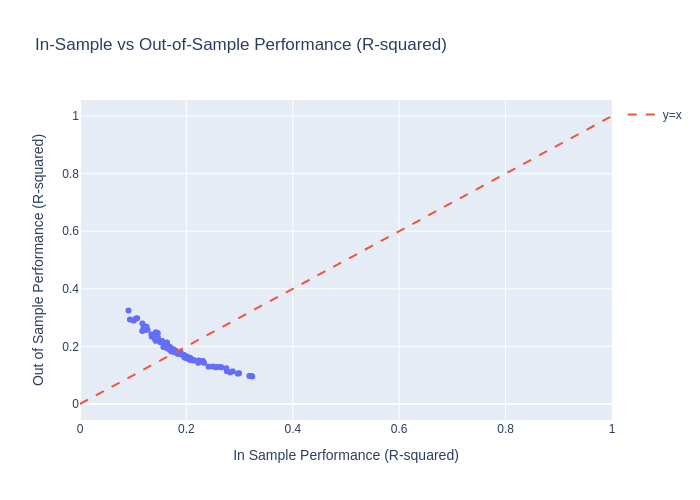

In [30]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Define linear form based on model3 specification
linear_form = 'HP ~ Attack + Defense'

# Number of repetitions for analysis
reps = 100
# Arrays to store in-sample and out-of-sample R-squared values
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Loop to perform multiple train-test splits and collect performance metrics
for i in range(reps):
    # 50-50 train-test split without a fixed random seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model to the training data
    model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Record in-sample R-squared
    in_sample_Rsquared[i] = model_fit.rsquared
    
    # Calculate and record out-of-sample R-squared
    out_of_sample_Rsquared[i] = np.corrcoef(
        pokeaman_test.HP, model_fit.predict(pokeaman_test))[0,1]**2

# Create a DataFrame to store the R-squared values
df = pd.DataFrame({
    "In Sample Performance (R-squared)": in_sample_Rsquared,
    "Out of Sample Performance (R-squared)": out_of_sample_Rsquared
})

# Visualization
fig = px.scatter(df, x="In Sample Performance (R-squared)", 
                 y="Out of Sample Performance (R-squared)",
                 title="In-Sample vs Out-of-Sample Performance (R-squared)")

# Add a y=x line for reference
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode="lines", name="y=x", 
                         line=dict(dash="dash")))

fig.show(renderer="png")


By analyzing performance across multiple random splits, we can see if the model consistently generalizes well or if its performance varies widely, indicating sensitivity to the specific train-test split.

If out-of-sample $R^2$ values are consistently lower than in-sample $R^2$, the model may be overfitting.

What we’re observing here is neither overfitting nor underfitting but rather a phenomenon called sampling variability or sampling noise. Which is due to random sampling variability



## 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

In [22]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


Train `Model 7` on Generation 1 Pokémon only and see how well it predicts for Pokémon in other generations.

By comparing the in-sample and out-of-sample performance of the Generation 1-only model to the original model, we can see if training only on Generation 1 limits the model’s ability to generalize to other generations.

The Gen1-only model appears to overfit Generation 1 data, leading to a high in-sample $R^2$ but poor generalizability to other generations since 'In sample' R-squared of gen1_predict_future is greater than 'Out of sample' R-squared.


In [35]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.00224240598972694 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


Training Model 7 on Generations 1 through 5 and testing it on Generation 6 to evaluate how well a model trained on historical data (earlier generations) can predict the latest data. 

Comparing with model7_fit (trained on all generations) lets us see if excluding Generation 6 from the training data impacts generalizability to this newest generation.

The Gen1–5 model’s in-sample $R^2$ (0.390) is close to the original, suggesting it captures similar patterns in the training data.

The Gen1–5 model has a higher out-of-sample  $R^2$ of 0.234 when predicting Generation 6 compared to the original model’s performance (0.002) on this test set.

Conclusion: Training on a broader range of generations (1–5) provides better predictive accuracy for Generation 6, though it’s still not perfect. This suggests that exposure to multiple generations helps generalize better to newer data.

In [34]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.005958087895268586 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


This code trains Model 6 on Generation 1 only and tests it on later generations, similar to how we tested Model 7 with Generation 1-only data.

The in-sample and out-of-sample $R^2$ values provide insights into Model 6’s generalizability when trained on just Generation 1 data.

The Gen1-only model has a higher in-sample $R^2$ (0.443), suggesting overfitting to Generation 1.

Despite this overfitting, the Gen1-only model achieves a relatively higher out-of-sample $R^2$ (0.193) than the original model (0.006), indicating some ability to generalize, though not strongly.

Conclusion: Model 6 trained only on Generation 1 does not generalize well to later generations, as evidenced by the drop in out-of-sample $R^2$. However, it performs slightly better than the original model on later generations.

In [36]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.005958087895268586 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


Here, Model 6 is trained on Generations 1 to 5 and tested on Generation 6.

This setup examines how well Model 6 generalizes to new Pokémon types and stats introduced in the latest generation when it has been trained only on older data.

The Gen1–5 model’s in-sample $R^2$ (0.335) is similar to the original model’s in-sample performance (0.333), indicating it captures similar patterns in the training data.

The Gen1–5 model’s out-of-sample $R^2$ (0.263) is close to the original model’s out-of-sample $R^2$ (0.296), indicating that training on Generations 1–5 allows it to generalize relatively well to Generation 6.

Conclusion: Training Model 6 on Generations 1–5 provides a balance between fitting the training data and generalizing to Generation 6, similar to the original model trained on all generations.